<h1><center> Análise de pellets plásticos como ferramenta para o estudo de permanência de microplásticos em praias arenosas. </center></h1>

Juana Gerevini Bozzetto

# 06. Classes de Histograma (testes)

- Extrair o histograma de 5 pellets com coloração distinta 
- Extrair o histograma das cores (classes) utilizadas por Zanetti (2019)

In [46]:
import skimage
import matplotlib.pyplot as plt
import os
import numpy as np

#--- Importando as imagens que serão analisadas ---#

from skimage import data
from skimage import io

lista_fotos = os.listdir('dados_rotina06')
print(lista_fotos)

img_lista = []
for img in lista_fotos:
    if not img.startswith('.'):
        filename = os.path.join('dados_rotina06', img)
        from skimage import io
        img_lista.append(io.imread(filename))


['amarelamento_baixo.jpg', 'amarelamento_muitoalto.jpg', 'amarelamento_nulo.jpg', 'amarelamento_moderado.jpg', 'amarelamento_alto.jpg']


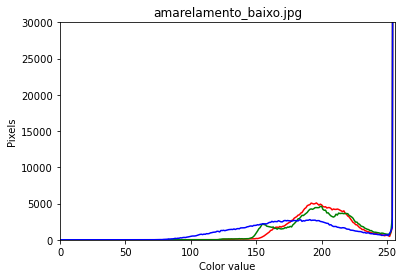

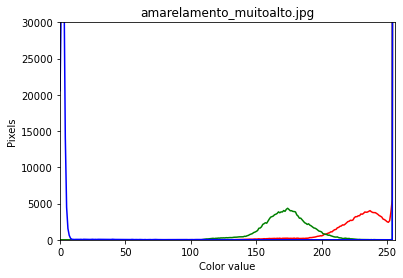

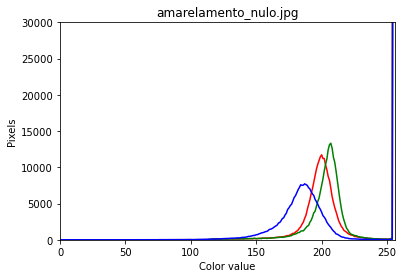

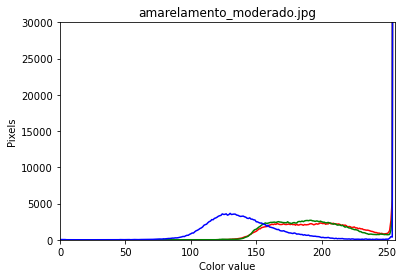

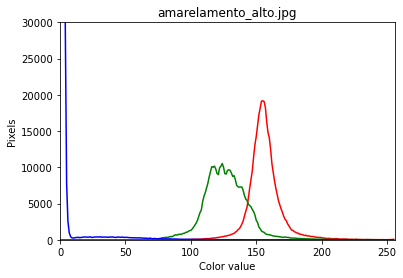

In [48]:
#--- Extraindo os histogramas ---#

from skimage import segmentation
from skimage import filters, morphology
from skimage.color import rgb2gray
from skimage.measure import label, regionprops

masked_list = []
for foto in img_lista:
    #--- Recortando a área de interesse (pellet) ---#
    img = rgb2gray(foto)
    mask = img > filters.threshold_otsu(img)
    clean_border = segmentation.clear_border(mask).astype(np.int64) 
    img_edges = segmentation.mark_boundaries(img, clean_border)
    label_img = label(clean_border)
    regions = regionprops(label_img)
    area = 0
    for region in regions:
        if region.area > area:
            area = region.area
            pellet = region
    maskr = morphology.remove_small_objects(mask, pellet.area)
    masked = foto.copy()
    masked[~maskr] = 255
    masked_list.append(masked)
    
# Tupla para selecionar as cores de cada canal 
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# Histrograma com as três linhas, uma para cada cor
i = 0
for masked in masked_list:
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(masked[maskr][..., channel_id], bins=256, range=(0, 256))
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.ylim([0, 30000])
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title(lista_fotos[i])
    i+=1
    plt.show()

## Dificuldades Encontradas
- Para algumas imagens o código não funciona
- Alguns histogramas quando feitos individualmentes ficam diferentes, pico azul nos histogramas, pq???